In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Data=pd.read_csv(r"C:\Users\admin\Downloads\credit_data.csv\credit_data.csv")

In [4]:
Data['Age_Group'] = pd.cut(Data['Age'], 
                         bins=[0, 17, 30, 45, 60, 100], 
                         labels=['Child', 'Young', 'Middle-aged', 'Senior', 'Elderly'])
Data['Age_Group'] = Data['Age_Group'].astype('object')


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279856 entries, 0 to 279855
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       279856 non-null  int64  
 1   Gender                    279856 non-null  object 
 2   Income                    279856 non-null  int64  
 3   Credit Score              279856 non-null  int64  
 4   Credit History Length     279856 non-null  int64  
 5   Number of Existing Loans  279856 non-null  int64  
 6   Loan Amount               279856 non-null  int64  
 7   Loan Tenure               279856 non-null  int64  
 8   Existing Customer         279856 non-null  object 
 9   State                     279856 non-null  object 
 10  City                      279856 non-null  object 
 11  LTV Ratio                 279856 non-null  float64
 12  Employment Profile        279856 non-null  object 
 13  Profile Score             279856 non-null  i

In [6]:
Data.describe()

,Age,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Profile Score
count,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000
mean,44.005217,76499.163856,582.953773,307.965146,4.701693,105795.342773,133.340654,71.643101,77.350155
std,15.311051,42875.575193,163.076754,175.083268,2.980351,40458.370929,96.064132,16.865785,24.509196
min,18.000000,9000.000000,300.000000,6.000000,0.000000,5294.000000,12.000000,40.000000,0.000000
25%,31.000000,42000.000000,446.000000,156.000000,2.000000,72173.000000,62.000000,58.105848,61.000000
50%,44.000000,68000.000000,584.000000,307.000000,5.000000,111263.000000,100.000000,72.133017,89.000000
75%,57.000000,104000.000000,722.000000,460.000000,7.000000,150000.000000,201.000000,86.239725,98.000000
max,70.000000,209000.000000,850.000000,611.000000,10.000000,150000.000000,359.000000,95.000000,100.000000


In [7]:
Data.isna().sum()

Age                             0
Gender                          0
Income                          0
Credit Score                    0
Credit History Length           0
Number of Existing Loans        0
Loan Amount                     0
Loan Tenure                     0
Existing Customer               0
State                           0
City                            0
LTV Ratio                       0
Employment Profile              0
Profile Score                   0
Occupation                  18272
Age_Group                       0
dtype: int64

In [8]:
x=Data.isnull().sum()
y=(Data.isnull().sum()/len(Data)*100)
z=({"Number of missing value":x,"Percentage of missing values":y})
Missing=pd.DataFrame(z,columns=['Number of missing value','Percentage of missing values'])
Missing.sort_values(by='Percentage of missing values',ascending=False)

,Number of missing value,Percentage of missing values
Occupation,18272,6.529072
Age,0,0.000000
Gender,0,0.000000
Income,0,0.000000
Credit Score,0,0.000000
Credit History Length,0,0.000000
Number of Existing Loans,0,0.000000
Loan Amount,0,0.000000
Loan Tenure,0,0.000000
Existing Customer,0,0.000000


In [9]:
Data=Data.drop(['Credit Score','Credit History Length','Number of Existing Loans','Loan Tenure','LTV Ratio',
                       'Existing Customer','Profile Score','Occupation'], axis=1)

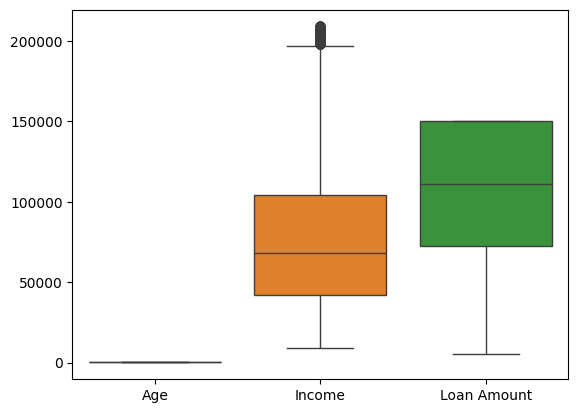

In [10]:
##checking for the outliers
sns.boxplot(Data)
plt.show()

In [11]:
Q1 = Data['Income'].quantile(0.25)
Q3 = Data['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [12]:
Data.loc[Data['Income'] < lower_bound, 'Income'] = lower_bound
Data.loc[Data['Income'] > upper_bound, 'Income'] = upper_bound

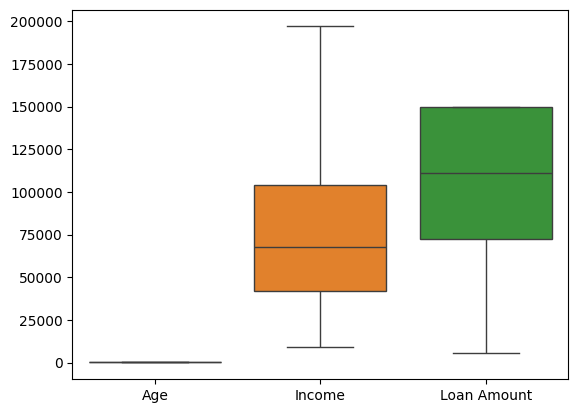

In [13]:
sns.boxplot(Data)
plt.show()

In [14]:
##Data Analysing.

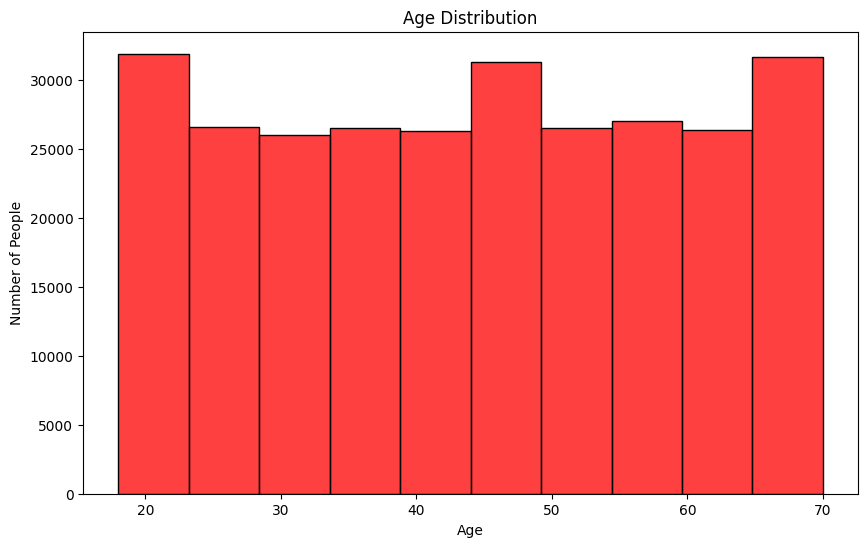

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(Data['Age'], bins=10,color='Red', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()

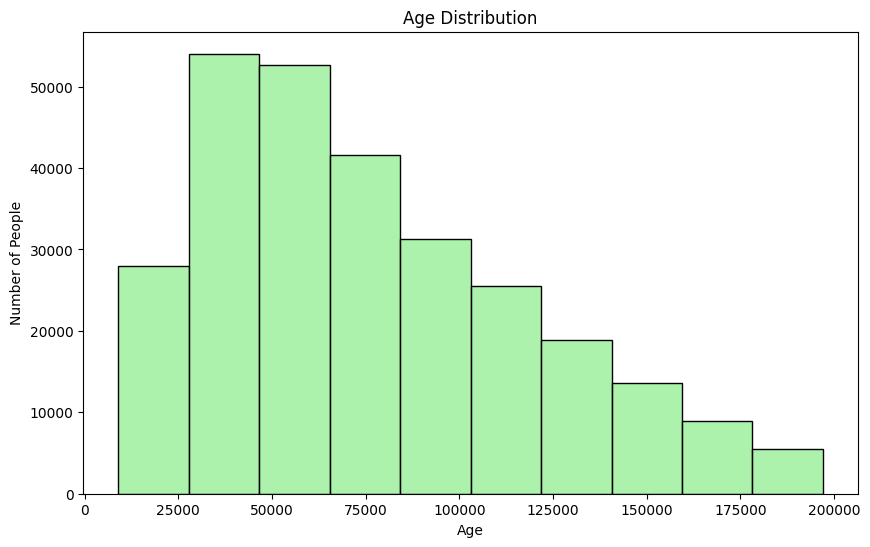

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(Data['Income'], bins=10,color='lightGreen', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()

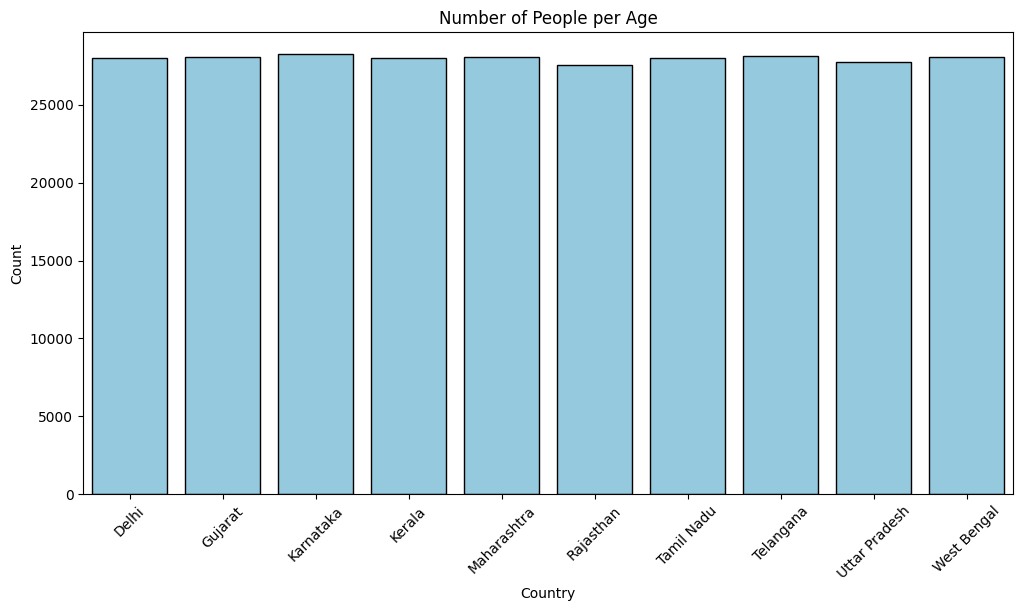

In [17]:
State_counts = Data['State'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=State_counts.index, y=State_counts.values, color='skyblue',edgecolor='black')
plt.title('Number of People per Age')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


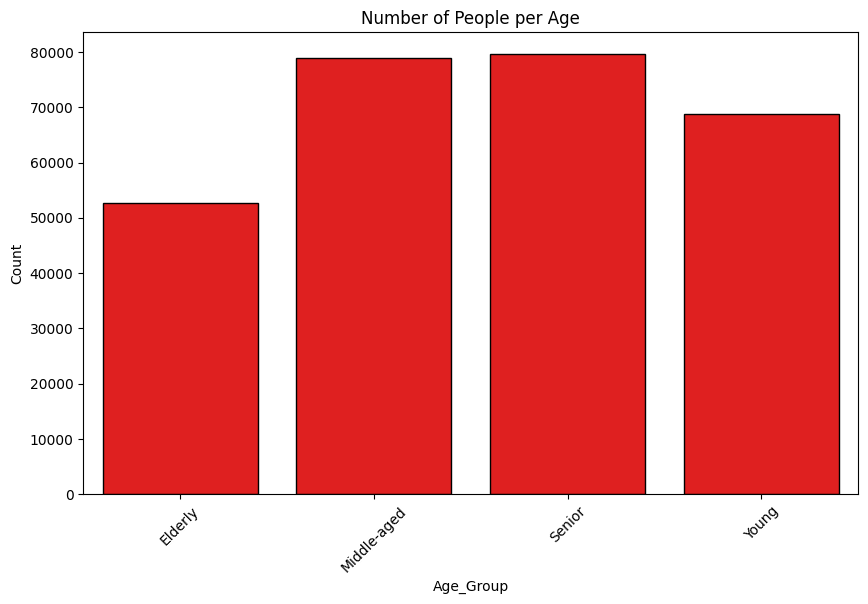

In [18]:
Age_counts = Data['Age_Group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=Age_counts.index, y=Age_counts.values, color='Red',edgecolor='black')
plt.title('Number of People per Age')
plt.xlabel('Age_Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [19]:
Data

,Age,Gender,Income,Loan Amount,State,City,Employment Profile,Age_Group
0,31,Male,36000,109373,Karnataka,Mysuru,Salaried,Middle-aged
1,25,Male,50000,150000,Karnataka,Bengaluru,Salaried,Young
2,62,Other,178000,69099,Uttar Pradesh,Kanpur,Salaried,Elderly
3,69,Female,46000,150000,Karnataka,Bengaluru,Self-Employed,Elderly
4,52,Male,132000,150000,Karnataka,Mysuru,Salaried,Senior
...,...,...,...,...,...,...,...,...
279851,69,Male,61000,150000,Tamil Nadu,Chennai,Salaried,Elderly
279852,45,Female,124000,80341,Karnataka,Bengaluru,Salaried,Middle-aged
279853,33,Female,71000,39851,Karnataka,Mysuru,Unemployed,Middle-aged
279854,67,Male,191000,150000,Delhi,New Delhi,Salaried,Elderly


In [20]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
Data['Gender']=Encoder.fit_transform(Data['Gender'])
Data['State']=Encoder.fit_transform(Data['State'])
Data['City']=Encoder.fit_transform(Data['City'])
Data['Employment Profile']=Encoder.fit_transform(Data['Employment Profile'])
Data['Age_Group']=Encoder.fit_transform(Data['Age_Group'])

# Data=Data.drop(['Age'],axis=1)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X=Data.drop(['Age_Group'],axis=1)
y=Data['Age_Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

test_preds = model.predict(X_test)
train_preds=model.predict(X_train)


from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

print(accuracy_score(y_train,train_preds))
print(accuracy_score(y_test,test_preds))
print(cross_val_score(model,X,y,cv=5).mean())

from sklearn.metrics import classification_report
print(classification_report(y_test,test_preds))

1.0
1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10424
           1       1.00      1.00      1.00     15854
           2       1.00      1.00      1.00     15941
           3       1.00      1.00      1.00     13753

    accuracy                           1.00     55972
   macro avg       1.00      1.00      1.00     55972
weighted avg       1.00      1.00      1.00     55972



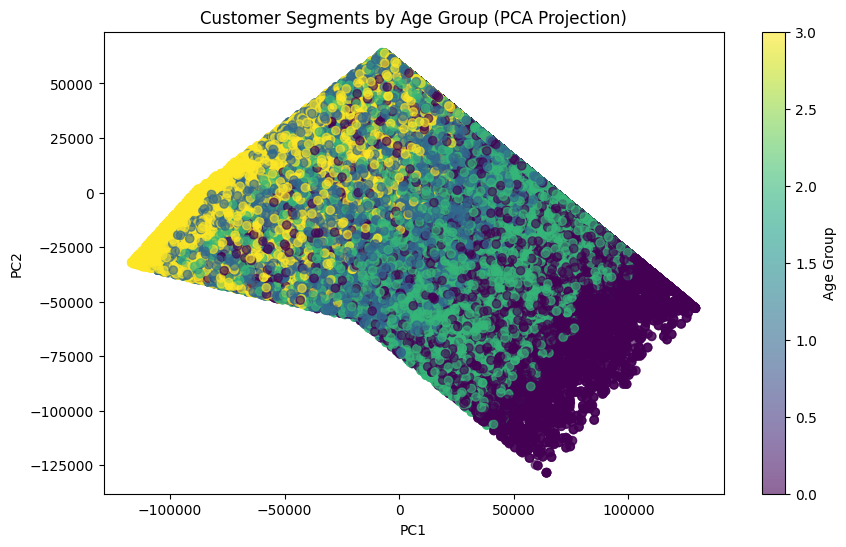

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.title("Customer Segments by Age Group (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Age Group")
plt.show()

In [31]:
numeric_features = Data.select_dtypes(include='number').columns.drop('Age_Group', errors='ignore')

segment_profile = Data.groupby('Age_Group')[numeric_features].mean().T  # Transpose for plotting
segment_profile

Age_Group,0,1,2,3
Age,65.516300,37.985685,53.050211,23.985606
Gender,0.573213,0.575856,0.573150,0.573977
Income,114162.373829,66040.409804,92070.574343,41597.531187
Loan Amount,117672.868706,104993.860525,113637.555161,88552.881794
State,4.482730,4.509820,4.489599,4.491523
City,11.176421,11.069319,11.077220,11.122612
Employment Profile,1.460604,1.585505,1.512437,1.616447


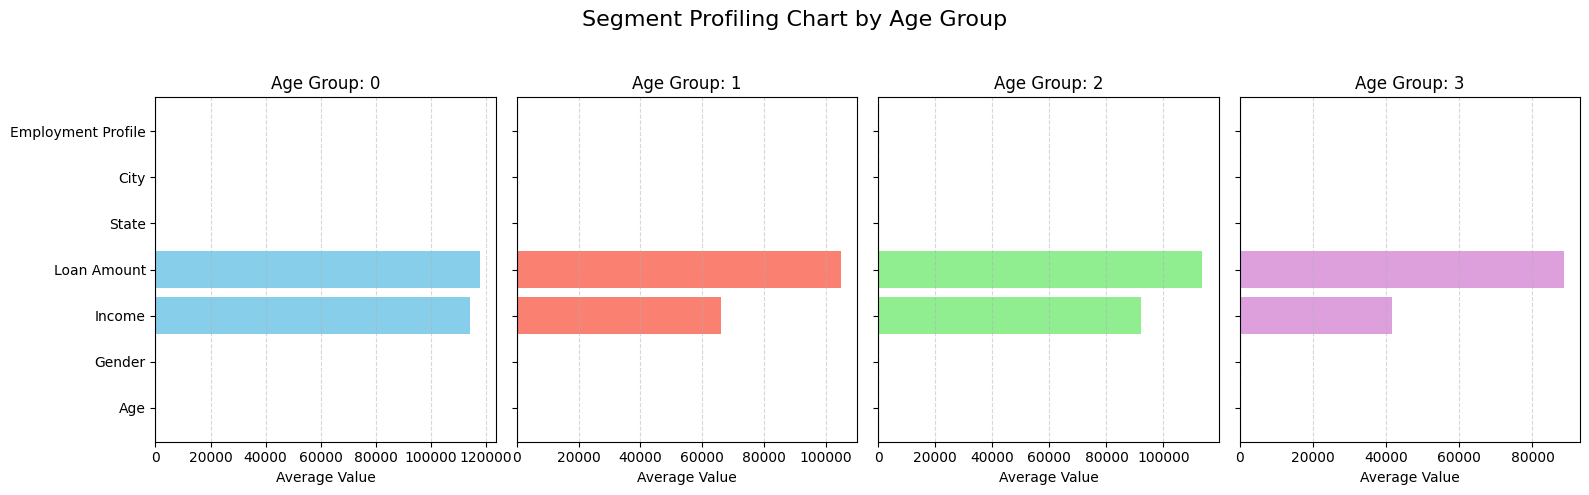

In [32]:
import matplotlib.pyplot as plt

features = segment_profile.index
segments = segment_profile.columns
colors = ['skyblue', 'salmon', 'lightgreen', 'plum', 'orange']

fig, axes = plt.subplots(nrows=1, ncols=len(segments), figsize=(4 * len(segments), 5), sharey=True)

if len(segments) == 1:
    axes = [axes]

for i, segment in enumerate(segments):
    ax = axes[i]
    ax.barh(features, segment_profile[segment], color=colors[i % len(colors)])
    ax.set_title(f'Age Group: {segment}')
    ax.set_xlabel('Average Value')
    ax.axvline(x=0, color='gray', linestyle='--')
    ax.grid(True, axis='x', linestyle='--', alpha=0.5)
    ax.invert_yaxis()

plt.suptitle("Segment Profiling Chart by Age Group", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
